In [67]:
import os
import sys
from copy import deepcopy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import yaml

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom import Mushroom, DEFAULT_CONFIG
import mushroom.data.multiplex as multiplex
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

In [5]:
run_dir = '/data/estorrs/mushroom/data/projects/examples/full_workflow'
mushroom_dir = os.path.join(run_dir, f'mushroom') # where mushroom results will be saved
Path(mushroom_dir).mkdir(parents=True, exist_ok=True)

## specify inputs

In [6]:
metadata = yaml.safe_load(open(os.path.join(run_dir, 'registered', 'metadata.yaml')))
yaml.safe_dump(metadata, sys.stdout)

resolution: 1.0
sections:
- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad
  - dtype: he
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif
  position: 0
  sid: S18-9906-U1
- data:
  - dtype: xenium
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad
  position: 5
  sid: S18-9906-U2
- data:
  - dtype: multiplex
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff
  position: 10
  sid: S18-9906-U3
- data:
  - dtype: xenium
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad
  position: 40
  sid: S18-9906-U9
- data:
  - dtype: multiplex
    filepath: /data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s4_S18-9906-U10_multiplex.ome.tiff
  positi

In [7]:
DEFAULT_CONFIG

{'sections': None,
 'dtype_to_chkpt': None,
 'dtype_specific_params': None,
 'sae_kwargs': {'size': 8,
  'patch_size': 1,
  'encoder_dim': 128,
  'codebook_dim': 64,
  'num_clusters': (8, 4, 2),
  'dtype_to_decoder_dims': {'multiplex': (256, 128, 64),
   'he': (256, 128, 10),
   'visium': (256, 512, 2048),
   'xenium': (256, 256, 256),
   'cosmx': (256, 512, 1024),
   'points': (256, 512, 1024)},
  'recon_scaler': 1.0,
  'neigh_scaler': 0.01},
 'trainer_kwargs': {'input_resolution': 1.0,
  'target_resolution': 0.02,
  'pct_expression': 0.05,
  'batch_size': 128,
  'num_workers': 0,
  'devices': 1,
  'accelerator': 'cpu',
  'max_epochs': 1,
  'steps_per_epoch': 1000,
  'lr': 0.0001,
  'out_dir': './outputs',
  'save_every': 1,
  'log_every_n_steps': 10,
  'logger_type': 'tensorboard',
  'logger_project': 'portobello',
  'channel_mapping': {}}}

In [8]:
config = deepcopy(DEFAULT_CONFIG)
config = utils.recursive_update(config, {
    'sections': metadata['sections'],
    'trainer_kwargs': {
        'input_resolution': metadata['resolution'],
        'target_resolution': metadata['resolution'] / 50.,
        'out_dir': os.path.join(mushroom_dir, 'outputs'),
        'accelerator': 'gpu',
    }
})
config

{'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad'}],
   'position': 40,
   'sid': 'S18-9906-U9'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data

In [9]:
# fps = [mapping['filepath'] 
#        for item in config['sections']
#        for mapping in item['data']
#        if 'multiplex' == mapping['dtype']]
# multiplex.get_channel_counts(fps)

In [10]:
config['dtype_specific_params'] = utils.recursive_update(config['dtype_specific_params'], {
    'visium': {
        'trainer_kwargs': {
            'target_resolution': .01 # lower resolution for visium
        }
    }
})
config

{'sections': [{'data': [{'dtype': 'visium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_visium.h5ad'},
    {'dtype': 'he',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s0_S18-9906-U1_he.tif'}],
   'position': 0,
   'sid': 'S18-9906-U1'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s1_S18-9906-U2_xenium.h5ad'}],
   'position': 5,
   'sid': 'S18-9906-U2'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s2_S18-9906-U3_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'S18-9906-U3'},
  {'data': [{'dtype': 'xenium',
     'filepath': '/data/estorrs/mushroom/data/projects/examples/full_workflow/registered/s3_S18-9906-U9_xenium.h5ad'}],
   'position': 40,
   'sid': 'S18-9906-U9'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/data

## train mushroom

In [11]:
mushroom = Mushroom.from_config(config)

INFO:root:loading spore for he
INFO:root:starting he processing
INFO:root:2 sections detected: ['S18-9906-U1', 'S18-9906-U16']
INFO:root:processing sections
INFO:root:generating image data for section S18-9906-U1
INFO:root:generating image data for section S18-9906-U16
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('S18-9906-U1', 'he'), ('S18-9906-U16', 'he')]
INFO:root:creating data loaders
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpvqm8tp5h
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpvqm8tp5h/_remote_module_non_scriptable.py
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading spore for multiplex
INFO:root:starting multiplex processing
INFO:root:using 24 channels
INFO:root:4 sections detected:

In [12]:
mushroom.section_ids

[('S18-9906-U1', 'visium'),
 ('S18-9906-U1', 'he'),
 ('S18-9906-U2', 'xenium'),
 ('S18-9906-U3', 'multiplex'),
 ('S18-9906-U9', 'xenium'),
 ('S18-9906-U10', 'multiplex'),
 ('S18-9906-U16', 'visium'),
 ('S18-9906-U16', 'he'),
 ('S18-9906-U17', 'xenium'),
 ('S18-9906-U18', 'multiplex'),
 ('S18-9906-U24', 'xenium'),
 ('S18-9906-U25', 'multiplex')]

In [13]:
mushroom.train()

INFO:root:starting training for he
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/he_chkpts exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name | Type | Params
------------------------------
0 | sae  | SAE  | 5.0 M 
------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.868    Total estimated model params size (MB)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:root:finished training he, saved chkpt to /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/he_chkpts/last-v1.ckpt
INFO:root:starting training for multiplex
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/multiplex_chkpts exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name | Type | Params
------------------------------
0 | sae  | SAE  | 5.0 M 
------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.914    Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:root:finished training multiplex, saved chkpt to /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/multiplex_chkpts/last-v1.ckpt
INFO:root:starting training for visium
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/visium_chkpts exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name | Type | Params
------------------------------
0 | sae  | SAE  | 24.8 M
------------------------------
24.8 M    Trainable params
0         Non-trainable params
24.8 M    Total params
99.234    Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:root:finished training visium, saved chkpt to /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/visium_chkpts/last-v1.ckpt
INFO:root:starting training for xenium
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/xenium_chkpts exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name | Type | Params
------------------------------
0 | sae  | SAE  | 5.2 M 
------------------------------
5.2 M     Trainable params
0         Non-trainable params
5.2 M     Total params
20.838    Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:root:finished training xenium, saved chkpt to /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs/xenium_chkpts/last-v1.ckpt


In [64]:
mushroom.embed_sections()

INFO:root:embedding he spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding visium spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding xenium spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

he


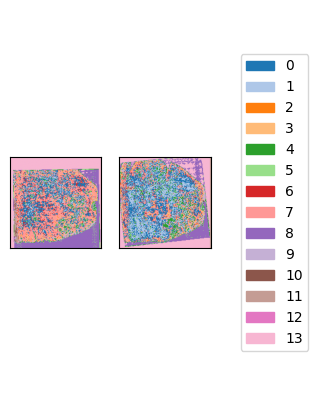

multiplex


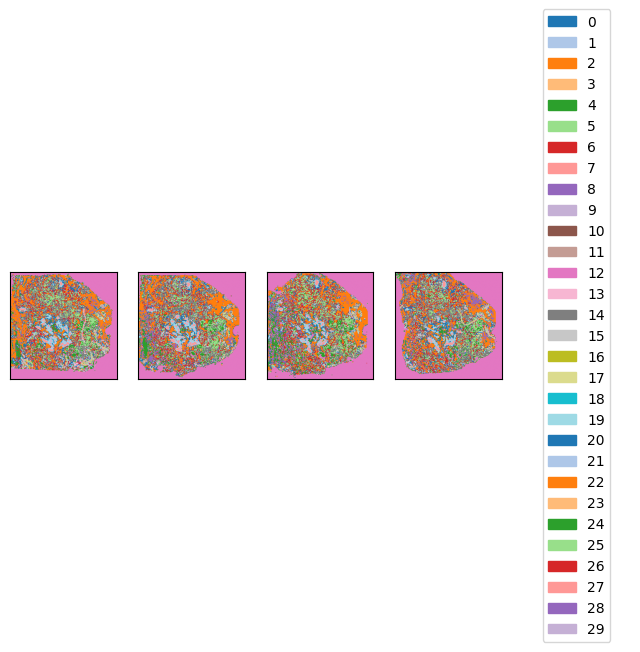

visium


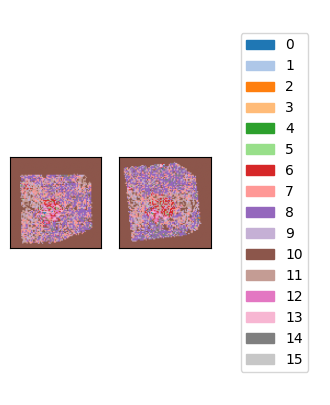

xenium


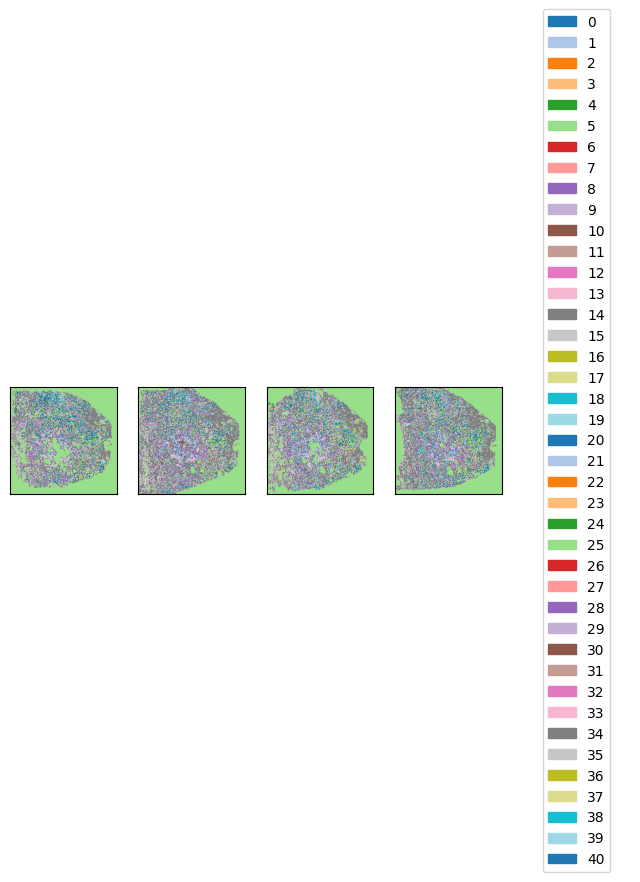

In [70]:
for dtype in mushroom.dtypes:
    print(dtype)
    mushroom.display_clusters(dtype)
    plt.show()

he


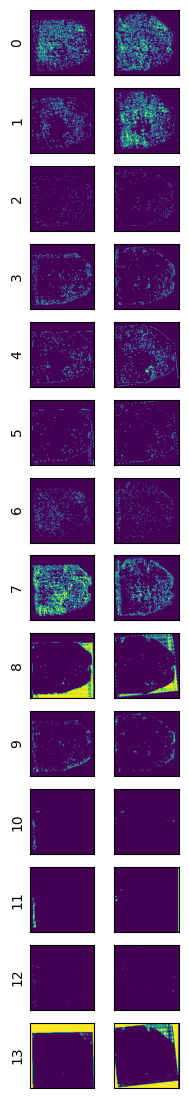

multiplex


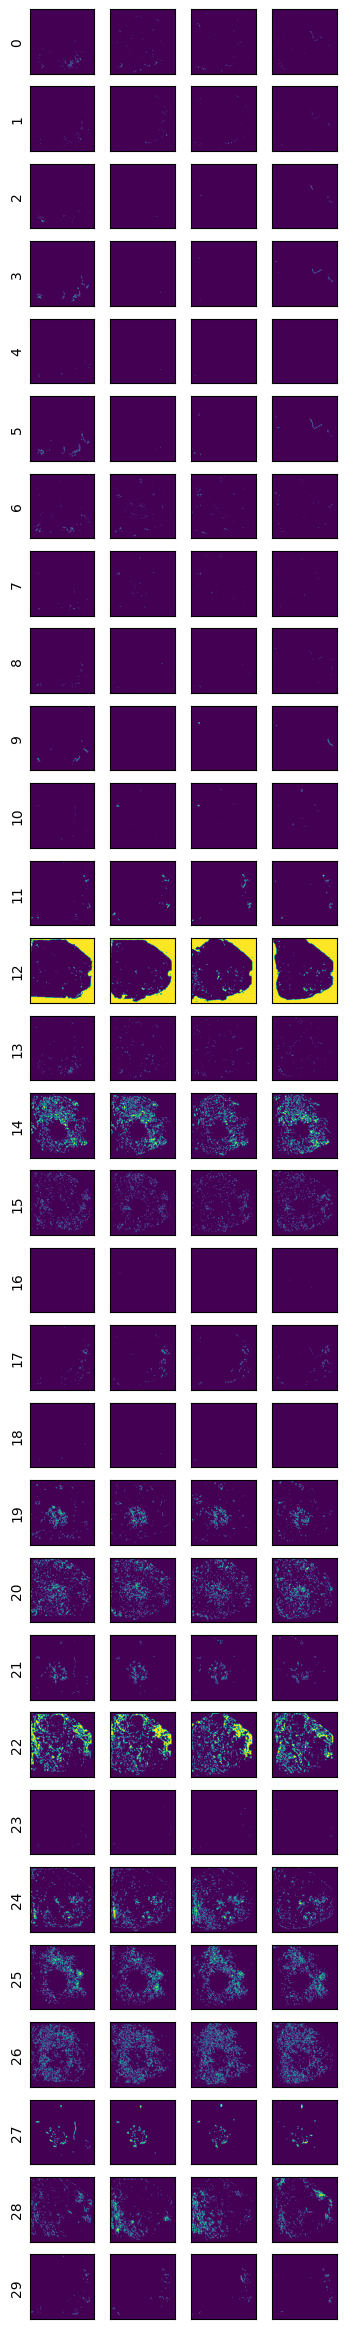

visium


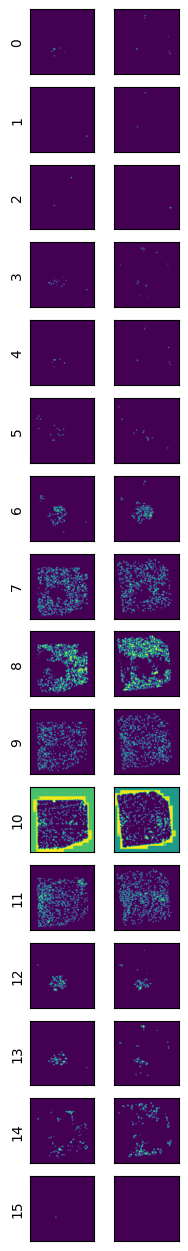

xenium


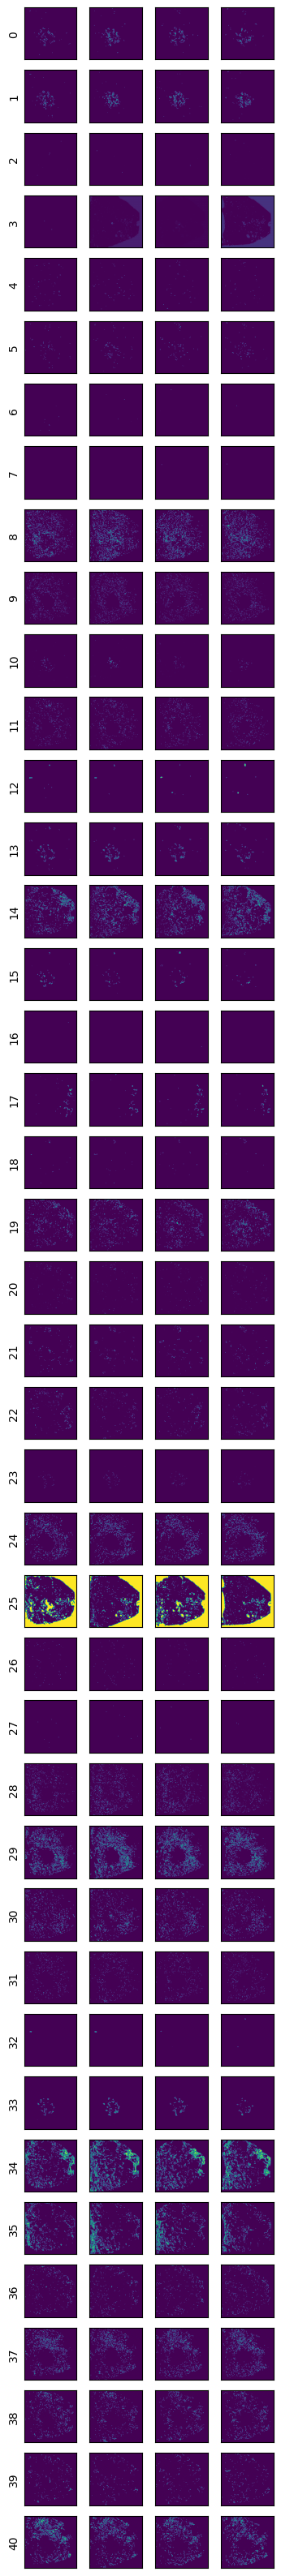

In [72]:
for dtype in mushroom.dtypes:
    print(dtype)
    mushroom.display_cluster_probs(dtype)
    plt.show()

In [186]:
%%time
z_scaler = .1
cluster_res = 1.5
dtype_to_volume = mushroom.generate_interpolated_volumes(z_scaler=z_scaler, level=0, resolution=cluster_res)

INFO:root:generating volume for he spore
INFO:root:generating volume for multiplex spore
INFO:root:generating volume for visium spore
INFO:root:generating volume for xenium spore
INFO:root:generating integrated volume
INFO:root:merging cluster volumes
INFO:root:constructing graph with 2085136 edges
INFO:root:229022 edges remaining after filtering
INFO:root:1444 of 1444 nodes processed
INFO:root:starting leiden clustering
INFO:root:finished integration, found 19 clusters


CPU times: user 1min 26s, sys: 3.31 s, total: 1min 29s
Wall time: 7.67 s


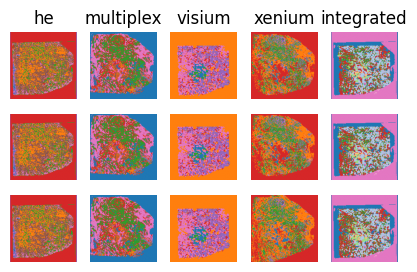

In [187]:
mushroom.display_volumes(positions=[1,2,3])

In [255]:
%%time
z_scaler = .1
cluster_res = 1.2
dtype_to_volume = mushroom.generate_interpolated_volumes(z_scaler=z_scaler, level=1, resolution=cluster_res)

INFO:root:generating volume for he spore
INFO:root:generating volume for multiplex spore
INFO:root:generating volume for visium spore
INFO:root:generating volume for xenium spore
INFO:root:generating integrated volume
INFO:root:merging cluster volumes
INFO:root:constructing graph with 123943689 edges
INFO:root:17603397 edges remaining after filtering
INFO:root:11133 of 11133 nodes processed
INFO:root:starting leiden clustering
INFO:root:finished integration, found 48 clusters


CPU times: user 27min 57s, sys: 15min 49s, total: 43min 47s
Wall time: 1min 57s


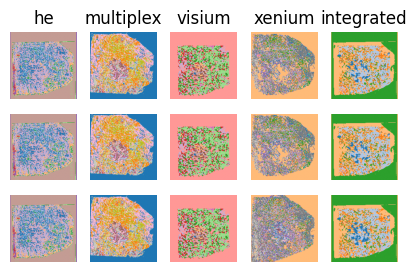

In [256]:
mushroom.display_volumes(positions=[1,2,3])

In [257]:
%%time
z_scaler = .1
cluster_res = 1.
dtype_to_volume = mushroom.generate_interpolated_volumes(z_scaler=z_scaler, level=2, resolution=cluster_res)

INFO:root:generating volume for he spore
INFO:root:generating volume for multiplex spore
INFO:root:generating volume for visium spore
INFO:root:generating volume for xenium spore
INFO:root:generating integrated volume
INFO:root:merging cluster volumes
INFO:root:constructing graph with 250050969 edges
INFO:root:38155425 edges remaining after filtering
INFO:root:15813 of 15813 nodes processed
INFO:root:starting leiden clustering
INFO:root:finished integration, found 6 clusters


CPU times: user 1h 14min 22s, sys: 56min 39s, total: 2h 11min 1s
Wall time: 5min 43s


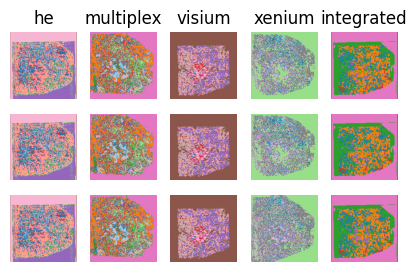

In [258]:
mushroom.display_volumes(positions=[1,2,3])

In [259]:
dtype_to_df = mushroom.calculate_cluster_intensities()
dtype_to_df.keys()

dict_keys(['he', 'multiplex', 'visium', 'xenium'])

In [261]:
dtype_to_df['multiplex']

,AMACR,AR,CD20 (D),CD31 (D),CD3e,CD4,CD45(D),CD68,CD8,CK14,...,Foxp3,HLA-DR,Ki67,LYVE1,Pan-Cytokeratin,Podoplanin,SMA (D),STEAP4,Vimentin,p63
0,2.083342,1.215975,2.659227,2.022224,1.731550,1.951565,1.923450,1.170695,2.871086,1.835130,...,0.998542,1.470885,2.580312,1.313631,1.224826,2.819868,0.665185,0.518937,1.644626,2.922387
1,3.003448,1.865167,3.729768,2.127462,1.736545,1.784309,2.033612,1.347468,3.957895,3.243221,...,1.613444,1.345752,3.776106,1.718393,2.159168,4.040641,0.203674,0.964203,1.255006,4.208398
2,6.263187,2.921259,7.392096,2.917501,2.473141,1.933578,3.090209,0.801959,8.403404,4.991067,...,2.924723,1.026636,7.355596,1.793453,2.187747,8.606646,0.534170,1.435706,1.297099,9.039543
3,15.848657,6.337023,18.491608,5.330578,4.289447,1.895381,5.568982,0.409917,21.408913,5.983678,...,7.286036,0.669927,17.414513,1.879210,1.429499,21.653008,0.548405,2.087180,0.735116,22.885002
4,6.284459,2.871622,7.680008,3.918045,4.277478,4.074769,4.020539,1.535785,8.665351,3.343468,...,3.047813,3.357188,7.270208,1.595990,0.908460,8.592957,0.270110,1.110464,2.691946,8.808448
5,10.320618,4.480206,12.133746,4.050330,3.580933,2.376797,4.358474,0.826291,13.952257,5.468339,...,4.947990,1.312476,11.674802,2.011855,1.930117,14.154042,0.406532,1.844895,1.165558,14.865244
6,2.076345,1.405439,2.800225,2.620273,2.647397,2.988368,2.489655,1.355490,3.022183,2.274121,...,1.290901,2.415490,2.673620,1.482551,0.977289,2.961729,0.861923,0.731280,2.598953,2.926610
7,1.998643,1.420258,2.700387,2.695233,2.996584,3.413756,2.700113,1.583665,2.859434,2.274461,...,1.390946,2.890555,2.611609,1.511943,0.983789,2.797906,0.946685,0.764155,2.804600,2.626465
8,4.703905,2.438423,5.603937,2.650374,2.167961,1.998953,2.780956,0.791833,6.282383,4.934624,...,2.323735,1.101909,5.737680,1.839105,2.268314,6.504300,0.793925,1.357099,1.522350,6.733850
9,30.238379,14.265762,36.452961,10.122453,8.114388,2.672088,9.719963,0.611883,40.329582,12.075899,...,17.344625,1.722530,32.902569,3.410461,2.046529,41.550159,-0.649404,5.209254,1.011280,44.094593


In [268]:
dtype_to_df = mushroom.calculate_cluster_intensities(projection_dtype='xenium')
dtype_to_df.keys()

dict_keys(['he', 'multiplex', 'visium', 'xenium'])

In [270]:
dtype_to_df['multiplex']

,AMACR,AR,CD20 (D),CD31 (D),CD3e,CD4,CD45(D),CD68,CD8,CK14,...,Foxp3,HLA-DR,Ki67,LYVE1,Pan-Cytokeratin,Podoplanin,SMA (D),STEAP4,Vimentin,p63
0,0.042851,0.663433,0.671257,2.171747,3.011137,3.681333,1.908751,1.736557,0.543116,-0.071547,...,0.365646,3.574933,0.231181,0.893007,-0.320985,0.251476,0.284306,0.124749,3.064740,-0.032165
1,-0.032866,0.570541,0.558120,2.073458,2.856373,3.504818,1.810511,1.585625,0.434206,-0.149873,...,0.288196,3.391930,0.116930,0.820731,-0.455049,0.148267,0.358861,0.088834,2.968631,-0.117949
2,-0.025536,0.511607,0.315535,0.513780,0.314143,0.356683,0.420882,1.407055,-0.029825,-0.123411,...,-0.084990,0.449976,0.060254,0.674556,1.476713,-0.015218,-0.005581,-0.036600,0.506318,-0.038653
3,-0.114291,1.251606,1.090710,3.976976,6.352878,7.828240,3.495045,3.497007,0.878468,-0.289240,...,0.845351,7.864249,0.301353,1.555385,-0.760330,0.240261,-0.454591,0.391097,5.782633,-0.336859
4,0.086634,0.615039,0.494614,0.991777,0.988179,1.190656,0.828355,1.286373,0.267692,0.194285,...,0.130454,1.157704,0.220549,0.710725,0.872916,0.214633,0.128683,0.068373,1.230148,0.111356
5,0.125671,0.651691,0.663351,1.653944,2.046653,2.466996,1.429681,1.429308,0.494988,0.126652,...,0.271541,2.359438,0.280580,0.804905,0.157055,0.330639,0.324708,0.109587,2.254164,0.147287
6,0.191955,0.540657,0.606432,1.281850,1.320533,1.586664,1.092111,1.199675,0.438542,0.072447,...,0.118611,1.475648,0.289849,0.699381,0.353926,0.332401,0.371481,0.025989,1.633716,0.239679
8,0.033496,0.283869,0.231813,0.431681,0.229709,0.271031,0.468749,0.539378,0.073631,0.027460,...,-0.011390,0.219429,0.037134,0.374739,0.323893,0.090337,0.638536,-0.028311,0.550344,0.041370
9,0.047495,0.377971,0.283724,0.406279,0.168988,0.180952,0.376634,0.752575,0.071343,0.026251,...,-0.009417,0.192089,0.072332,0.416309,0.671837,0.094198,0.345966,-0.020760,0.445991,0.056125
10,0.000150,0.541650,0.565872,2.037011,2.728334,3.324338,1.799670,1.416602,0.442899,-0.125476,...,0.292764,3.172138,0.127149,0.802454,-0.601645,0.189432,0.575782,0.091476,2.932226,-0.068271


In [272]:
out_dir = os.path.join(mushroom_dir, 'outputs')
prefix = os.path.join(out_dir, f'clusters')
for dtype in mushroom.dtype_to_volume.keys():
    for i in range(3):
        root = prefix + f'_{dtype}_axis{i}'
        is_probs = False
        volume = mushroom.dtype_to_volume[dtype]
        vis_utils.volume_to_gif(volume, is_probs, root + '_section.gif', axis=i)
        
        if i in [1, 2]:
            rgb = vis_utils.display_labeled_as_rgb(volume[0], preserve_indices=True)
            vis_utils.save_reference_gif(rgb, root + '_ref.gif', axis=i-1)

In [274]:
mushroom.save()

INFO:root:saving config and outputs to /data/estorrs/mushroom/data/projects/examples/full_workflow/mushroom/outputs
